<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [16]:
import pandas as pd

Load the dataset into a dataframe.


In [17]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


6         41244.0
15       156000.0
17        87996.0
36       117540.0
47         2169.0
           ...   
11320     71085.0
11321     35518.0
11324     11004.0
11345     68705.0
11384     58024.0
Name: ConvertedComp, Length: 1008, dtype: float64


65537.5

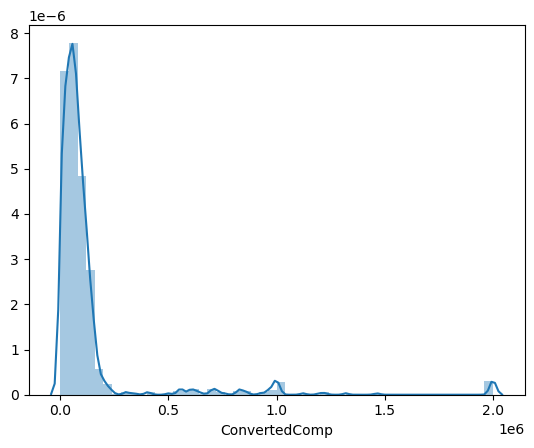

In [35]:
# your code goes here
df.dropna(inplace = True)
print(df['ConvertedComp'])
import seaborn as sns
sns.distplot(df["ConvertedComp"],kde=True)

Plot the histogram for the column `ConvertedComp`.


(array([932.,  14.,   9.,  13.,  12.,  12.,   3.,   1.,   0.,  12.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

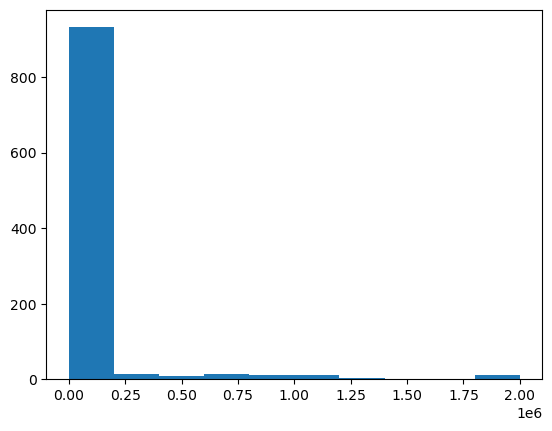

In [19]:
# your code goes here
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
plt.hist(df['ConvertedComp'])

What is the median of the column `ConvertedComp`?


In [20]:
# your code goes here

print("ConvertedComp Median:", df['ConvertedComp'].median())
print("Age Median:", df['Age'].median())

ConvertedComp Median: 65537.5
Age Median: 29.0


How many responders identified themselves only as a **Man**?


In [21]:
# your code goes here
df_woman=df[df['Gender']=='Men']
print("Woman Median:", df_woman['ConvertedComp'].median())

Woman Median: nan


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [22]:
# your code goes here
df_woman=df[df['Gender']=='Woman']
print("Woman Median:", df_woman['ConvertedComp'].median())

Woman Median: 60000.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [33]:
# your code goes here
# your code goes here
df['ConvertedComp'].median()

65537.5

Plot a histogram of the column `Age`.


(array([101., 267., 307., 162.,  85.,  51.,  21.,  11.,   2.,   1.]),
 array([19. , 23.4, 27.8, 32.2, 36.6, 41. , 45.4, 49.8, 54.2, 58.6, 63. ]),
 <BarContainer object of 10 artists>)

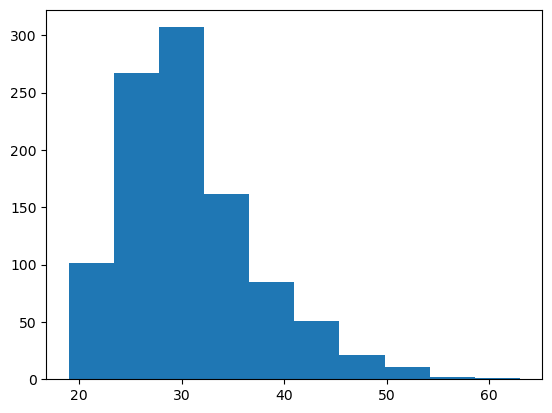

In [24]:
# your code goes here
plt.hist(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


65537.5


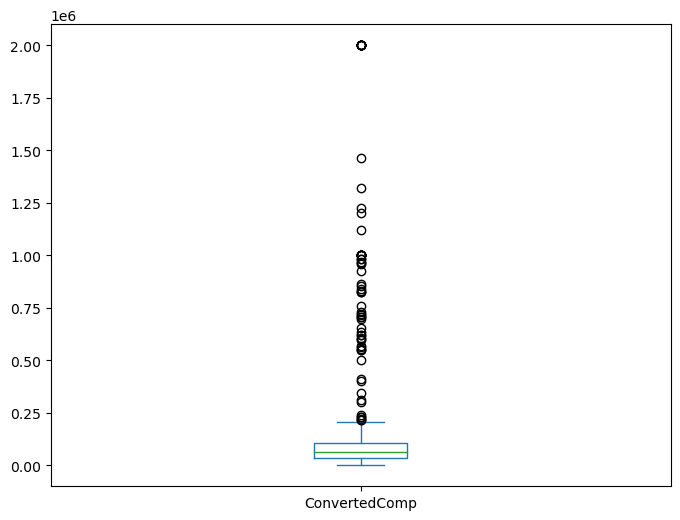

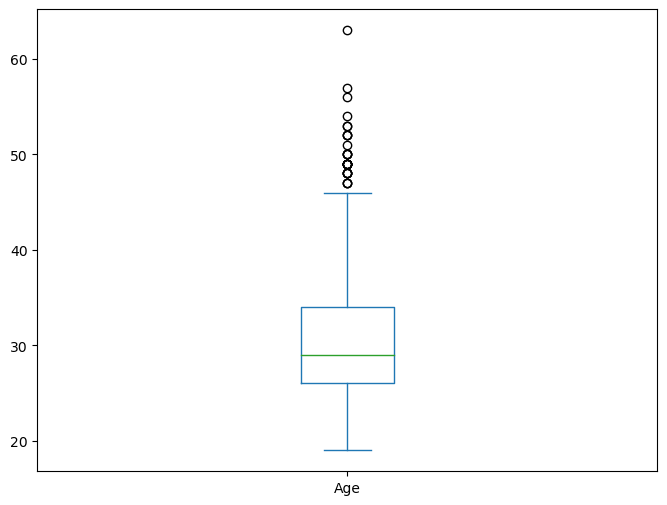

In [25]:
# your code goes here
print(df['ConvertedComp'].median())
df_cv = pd.DataFrame(data=df['ConvertedComp'])
df_cv.plot(kind='box', figsize=(8,6))
plt.show()
df_age = pd.DataFrame(data=df['Age'])
df_age.plot(kind='box', figsize=(8,6))
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [26]:
# your code goes here
df['ConvertedComp'].dropna(axis=0,inplace=True) 
Q1,Q3=df['ConvertedComp'].quantile(.25),df['ConvertedComp'].quantile(.75)
IQR=Q3 - Q1
print('The Inter Quartile Range for ConvertedComp:', IQR)

The Inter Quartile Range for ConvertedComp: 70842.5


Find out the upper and lower bounds.


In [27]:
# your code goes here
upper=Q3+(IQR*1.5)
lower=Q1-(IQR*1.5)

print('Upper Bound:', upper)
print('Lower Bound:', lower)

Upper Bound: 211511.25
Lower Bound: -71858.75


Identify how many outliers are there in the `ConvertedComp` column.


In [28]:
# your code goes here
(df['ConvertedComp']<lower) | (df['ConvertedComp']>upper)


6        False
15       False
17       False
36       False
47       False
         ...  
11320    False
11321    False
11324    False
11345    False
11384    False
Name: ConvertedComp, Length: 1008, dtype: bool

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [36]:
# your code goes here
df2 = df['ConvertedComp'].clip(upper, lower)
df2.mean()



77398.25372023809

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [31]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.057366,-0.065603,-0.060420,-0.038389,0.027928
CompTotal,-0.057366,1.000000,-0.028490,-0.006841,-0.039165,0.012503
ConvertedComp,-0.065603,-0.028490,1.000000,0.102571,-0.012538,0.109655
WorkWeekHrs,-0.060420,-0.006841,0.102571,1.000000,0.082863,0.040690
CodeRevHrs,-0.038389,-0.039165,-0.012538,0.082863,1.000000,-0.007431
Age,0.027928,0.012503,0.109655,0.040690,-0.007431,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
